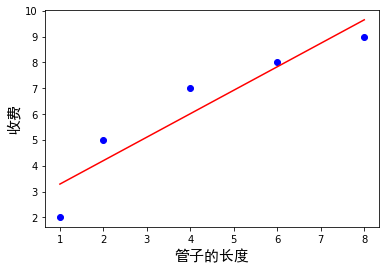

In [60]:
#p53 一元线性回归
import numpy as np
import matplotlib.pyplot as plt

if __name__=='__main__':
    x = np.array([1,2,4,6,8])
    y = np.array([2,5,7,8,9])
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    denominator = 0.0
    numerator = 0.0
    for x_i,y_i in zip(x,y):
        numerator += (x_i-x_mean)*(y_i - y_mean)
        denominator += (x_i - x_mean) **2
    a = numerator/denominator
    b = y_mean - a * x_mean
    y_predict = a * x + b
    plt.scatter(x,y,color='b')
    plt.plot(x,y_predict,color='r')
    plt.xlabel('管子的长度',fontproperties='simHei',fontsize = 15)
    plt.ylabel('收费',fontproperties='simHei',fontsize = 15)
    plt.show()
        
    

In [63]:
#p57 多元线性回归
import numpy as np
from numpy import linalg

class MLinearRegression:
    def __init__(self):
        self.coef_ = None  #代表的是权重
        self.interception_ = None #代表的是截距
        self._theta = None #代表的是权重+截距

    '''
    规范下代码，X_train代表的是矩阵X大写，y_train代表的是向量y小写
    '''
    def fit(self,X_train, y_train):
        assert X_train.shape[0] == y_train.shape[0], \
        "训练集的矩阵行数与标签的行数保持一致"
        ones = np.ones((X_train.shape[0], 1))
        X_b = np.hstack((ones, X_train))  # 将X矩阵转为第一列为1，其余不变的X_b矩阵
        self._theta = linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self

    def predict(self,X_predict):
        ones = np.ones((X_predict.shape[0], 1))
        X_b = np.hstack((ones, X_predict))  # 将X矩阵转为第一列为1，其余不变的X_b矩阵
        return X_b.dot(self._theta) #得到的就是预测值

    def mean_squared_error(self, y_true, y_predict):
        return np.sum((y_true - y_predict) ** 2) / len(y_true)

    def score(self,X_test,y_test): #使用r square
        y_predict = self.predict(X_test)
        return 1 - (self.mean_squared_error(y_test,y_predict) / (np.var(y_test)))




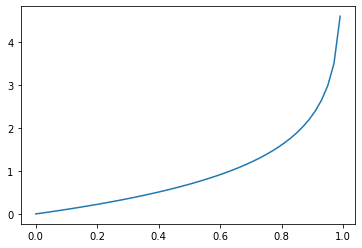

In [3]:
#图4-12出错
import numpy as np
import matplotlib.pyplot as plt


def logp2(x):
    y = -np.log(1-x)
    return y

plot_x = np.linspace(0,0.99,50)
plot_y = logp2(plot_x)
plt.plot(plot_x,plot_y)
plt.show()
    

In [45]:
#p67 逻辑回归
import numpy as np


class LogisticRegressionSelf:

    def __init__(self):
        """初始化Logistic regression模型"""
        self.coef_ = None #维度
        self.intercept_ = None #截距
        self._theta = None

    #sigmoid函数，私有化函数
    def _sigmoid(self,x):
        y = 1.0 / (1.0 + np.exp(-x))
        return y

    def fit(self,X_train,y_train,eta=0.01,n_iters=1e4):
        assert X_train.shape[0] == y_train.shape[0], '训练数据集的长度需要和标签长度保持一致'

        #计算损失函数
        def J(theta,X_b,y):
            p_predcit = self._sigmoid(X_b.dot(theta))
            try:
                return -np.sum(y*np.log(p_predcit) + (1-y)*np.log(1-p_predcit)) / len(y)
            except:
                return float('inf')

        #求sigmoid梯度的导数
        def dJ(theta,X_b,y):
            x = self._sigmoid(X_b.dot(theta))
            return X_b.T.dot(x-y)/len(X_b)

        #模拟梯度下降
        def gradient_descent(X_b,y,initial_theta,eta,n_iters=1e4,epsilon=1e-8):
            theta = initial_theta
            i_iter = 0
            while i_iter < n_iters:
                gradient = dJ(theta,X_b,y)
                last_theta = theta
                theta = theta - eta * gradient
                i_iter += 1
                if (abs(J(theta,X_b,y) - J(last_theta,X_b,y)) < epsilon):
                    break
            return theta

        X_b = X_train
        initial_theta = np.zeros(X_b.shape[1]) #列向量
        self._theta = gradient_descent(X_b,y_train,initial_theta,eta,n_iters)
        self.intercept_ = self._theta[0] #截距
        self.coef_ = self._theta[1:] #维度
        return self


    def predict_proba(self,X_predict):
        X_b = X_predict
        return self._sigmoid(X_b.dot(self._theta))


    def predict(self,X_predict):
        proba = self.predict_proba(X_predict)
        return np.array(proba > 0.5,dtype='int')


In [62]:
if __name__=='__main__':
    
    emp = LogisticRegressionSelf()

    filename='D:/123.txt' #训练集目录
    def loadDataSet():   #读取数据（这里只有两个特征）
        dataMat = []
        labelMat = []
        fr = open(filename)
        for line in fr.readlines():
            lineArr = line.strip().split()
            dataMat.append([1,float(lineArr[0]), float(lineArr[1])])   
            labelMat.append(int(lineArr[2]))
        return dataMat,labelMat
    x,y=loadDataSet()
    X=np.array(x)
    Y=np.array(y)
    emp.fit(X,Y)
    P=np.array([1.0,0,12])
    print(emp.predict(P))

0
